In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(x.shape,y.shape)

cuda


/home/e.gemmell/neural_net_toys/venv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


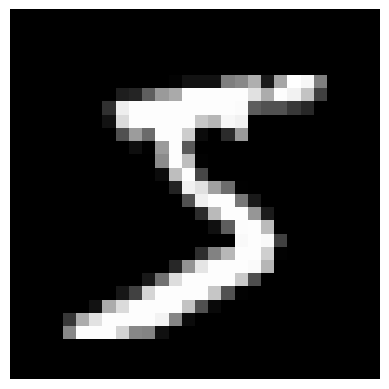

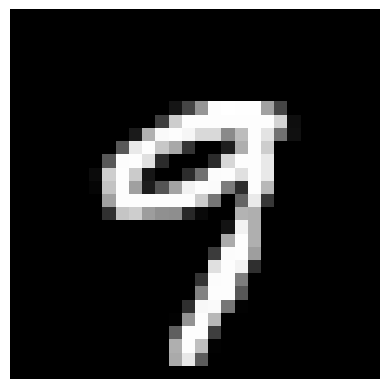

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

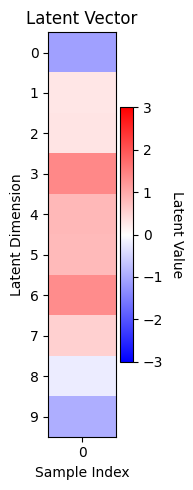

In [2]:
class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        slice_i = torch.tensor(self.data[idx], dtype=torch.float32)
        return slice_i

def show_bw_image(img_array):
    plt.imshow(img_array.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

X = x/255
Y = np.array([int(num) for num in y])
# print(type(Y),type(Y[0]))
train_dataset = MnistDataset(X[:63000])
val_dataset = MnistDataset(X[63000:])
show_bw_image(train_dataset[0])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1024, shuffle=True, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
show_bw_image(next(iter(train_loader))[0])
print(next(iter(train_loader))[0])

def GenerateLatentData(i):
    latent = torch.randn(i,10)
    return latent

def visualise_latent(z, title="Latent Vector"):

    z = z.detach().cpu().numpy()
    
    # Ensure z has shape (n, 10)
    if z.ndim == 1:
        z = z.reshape(1, -1)
    elif z.shape[1] != 10:
        raise ValueError(f"Expected shape (_, 10), got {z.shape}")

    # Transpose to make latent dimensions vertical
    z = z.T  # shape becomes (10, n)

    fig, ax = plt.subplots(figsize=(max(2, 0.6 * z.shape[1]), 5))
    
    cax = ax.imshow(z, cmap='bwr', aspect='auto', vmin=-3, vmax=3)

    cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
    cbar.set_label('Latent Value', rotation=270, labelpad=15)

    ax.set_title(title)
    ax.set_ylabel("Latent Dimension")
    ax.set_xlabel("Sample Index")
    ax.set_yticks(range(10))
    ax.set_xticks(range(z.shape[1]))
    plt.tight_layout()
    plt.show()


latent_example = GenerateLatentData(1)
visualise_latent(latent_example)


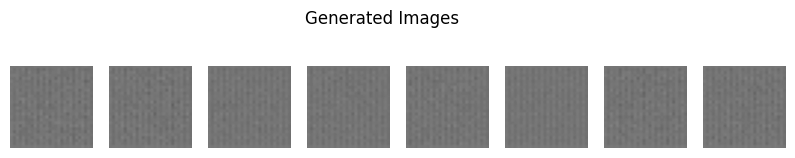

[0] D Loss: 0.6694 | G Loss: 1.3176


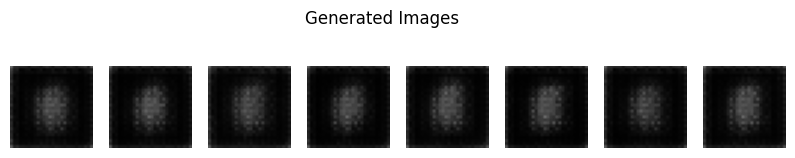

[1] D Loss: 0.9412 | G Loss: 0.9148


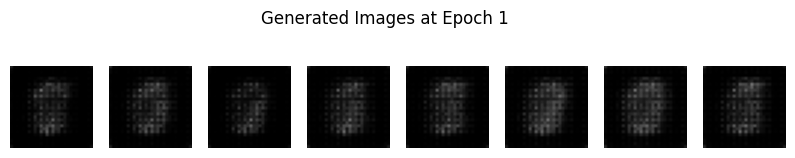

[2] D Loss: 1.0217 | G Loss: 0.9215


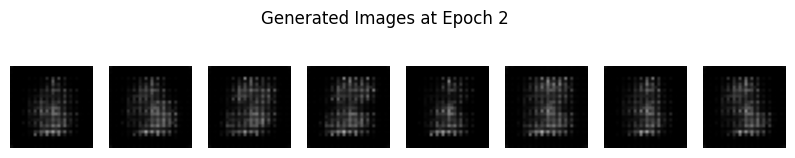

[3] D Loss: 0.9985 | G Loss: 0.9524


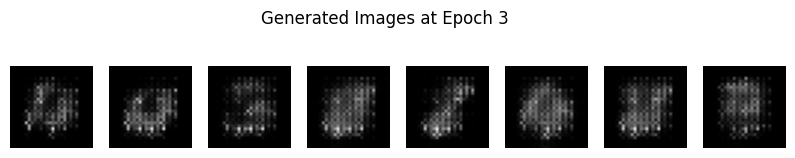

[4] D Loss: 1.2752 | G Loss: 0.9308


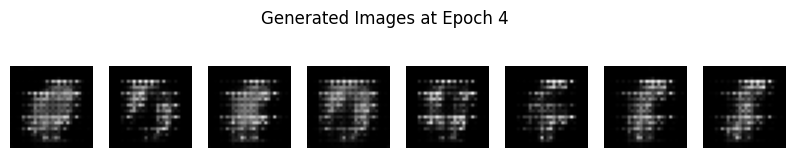

[5] D Loss: 1.1022 | G Loss: 1.0893


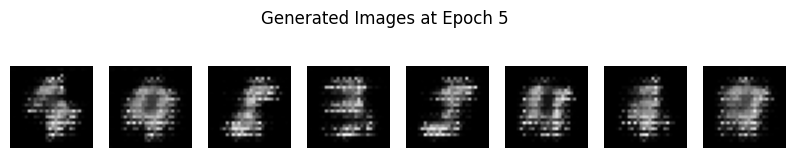

[6] D Loss: 1.1303 | G Loss: 1.0284


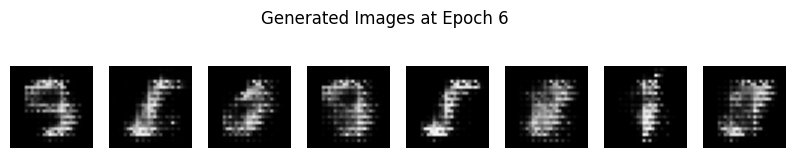

[7] D Loss: 1.4716 | G Loss: 0.7994


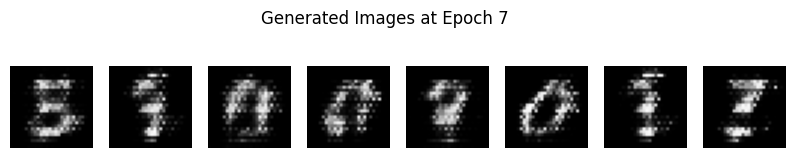

[8] D Loss: 1.3074 | G Loss: 0.9056


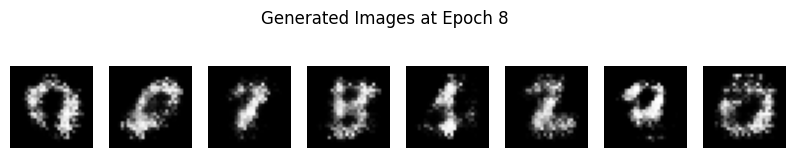

[9] D Loss: 1.3471 | G Loss: 0.8803


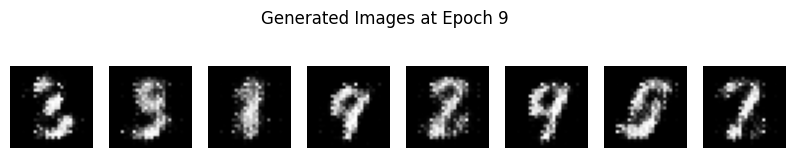

[10] D Loss: 1.3073 | G Loss: 0.8711


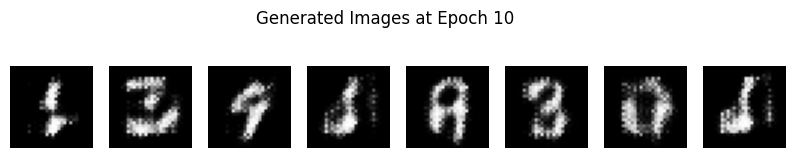

[11] D Loss: 1.4099 | G Loss: 0.8524


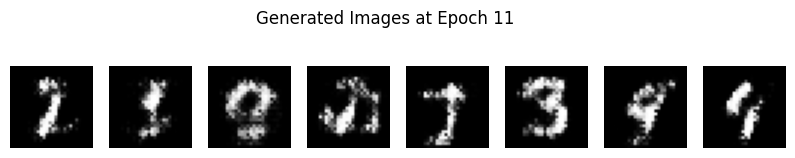

[12] D Loss: 1.3999 | G Loss: 0.8159


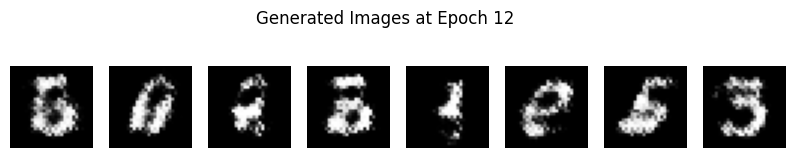

[13] D Loss: 1.4027 | G Loss: 0.8208


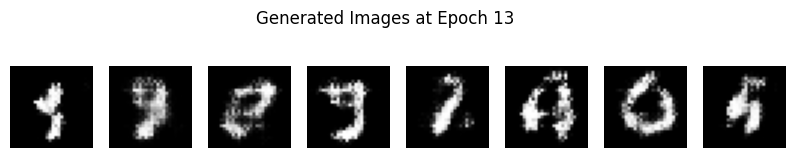

[14] D Loss: 1.3217 | G Loss: 0.8764


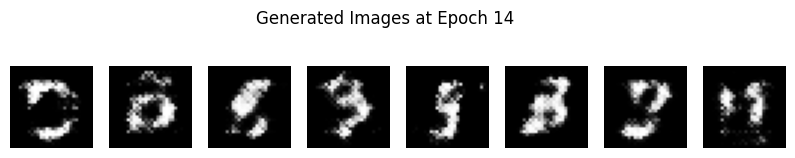

[15] D Loss: 1.4637 | G Loss: 0.8022


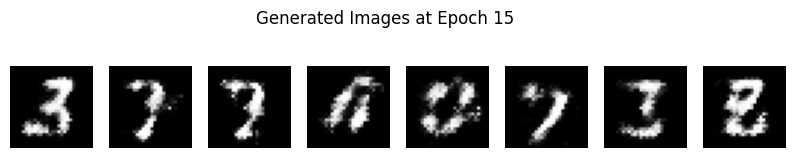

[16] D Loss: 1.3848 | G Loss: 0.8478


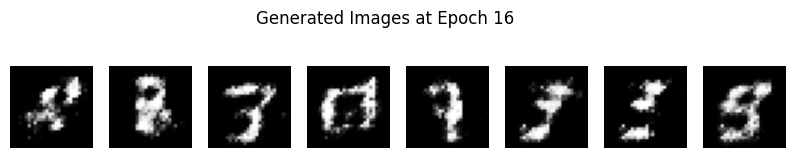

[17] D Loss: 1.3162 | G Loss: 0.8672


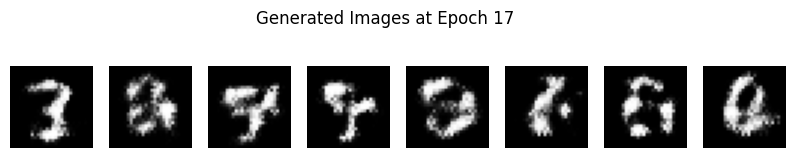

[18] D Loss: 1.3647 | G Loss: 0.8622


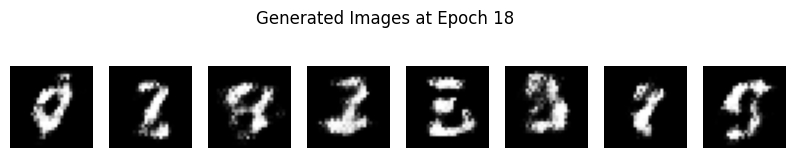

[19] D Loss: 1.3099 | G Loss: 0.8766


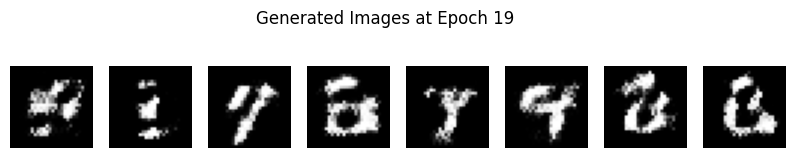

[20] D Loss: 1.3082 | G Loss: 0.8714


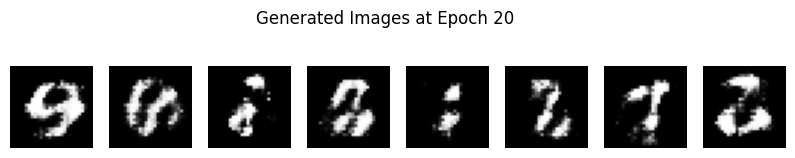

[21] D Loss: 1.3404 | G Loss: 0.8363


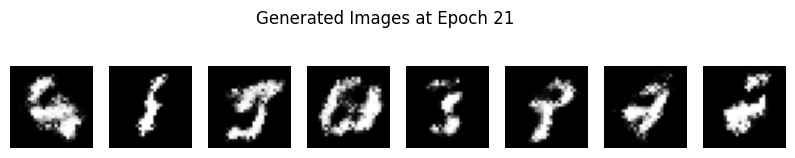

[22] D Loss: 1.2753 | G Loss: 0.8403


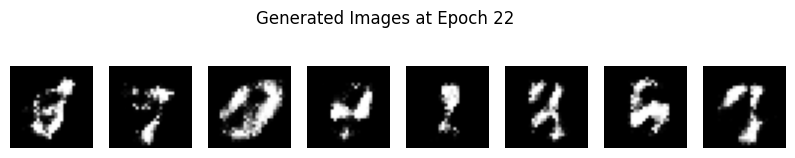

[23] D Loss: 1.2850 | G Loss: 0.8707


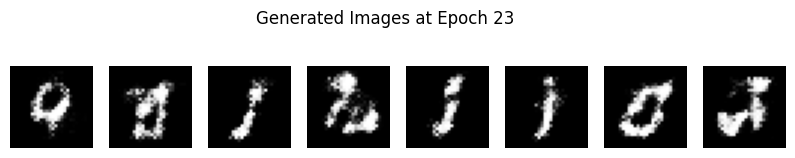

[24] D Loss: 1.2303 | G Loss: 0.9240


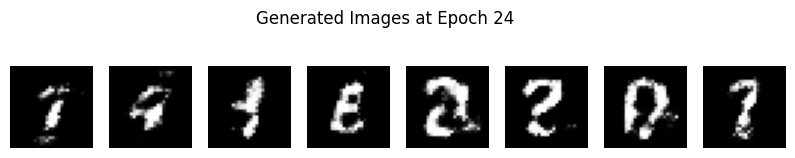

[25] D Loss: 1.3047 | G Loss: 0.8652


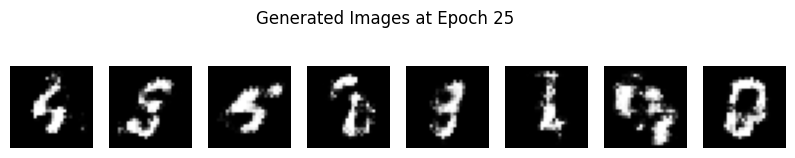

[26] D Loss: 1.3145 | G Loss: 0.8461


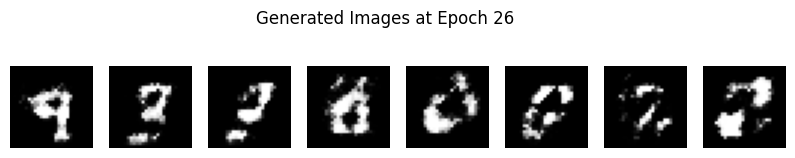

[27] D Loss: 1.3105 | G Loss: 0.8583


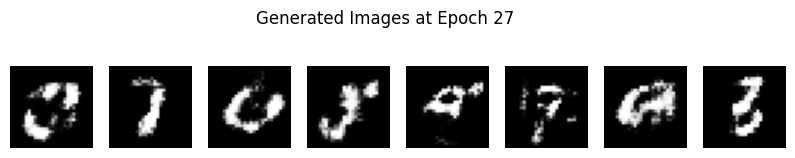

[28] D Loss: 1.3862 | G Loss: 0.8104


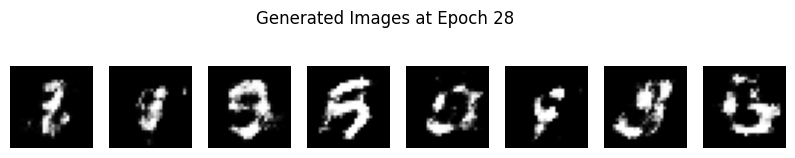

[29] D Loss: 1.3254 | G Loss: 0.8738


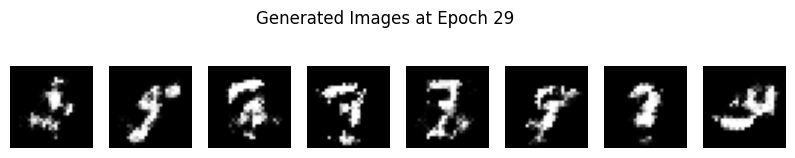

[30] D Loss: 1.3402 | G Loss: 0.8444


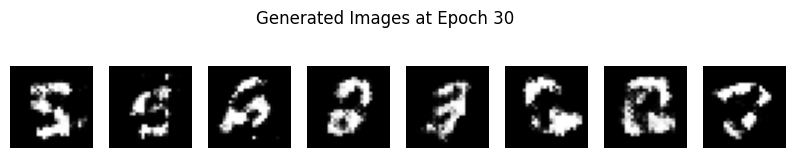

[31] D Loss: 1.3545 | G Loss: 0.8857


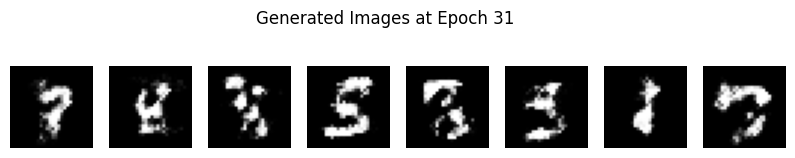

[32] D Loss: 1.3049 | G Loss: 0.8546


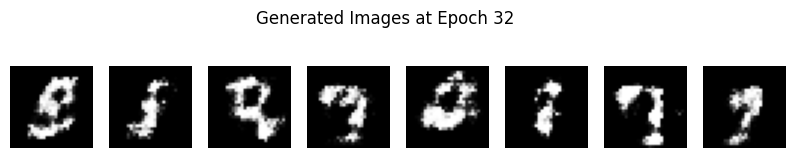

[33] D Loss: 1.3904 | G Loss: 0.8253


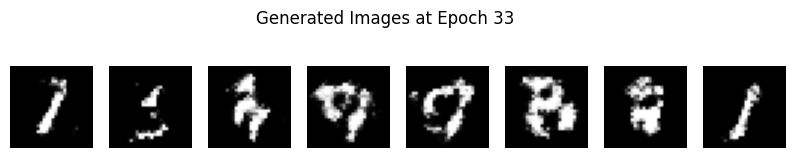

[34] D Loss: 1.3449 | G Loss: 0.8710


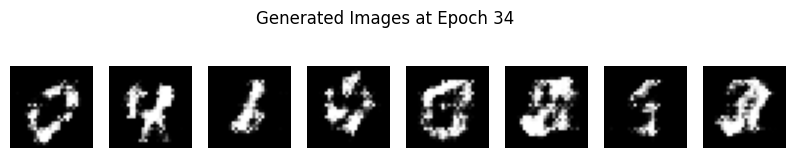

[35] D Loss: 1.3458 | G Loss: 0.8486


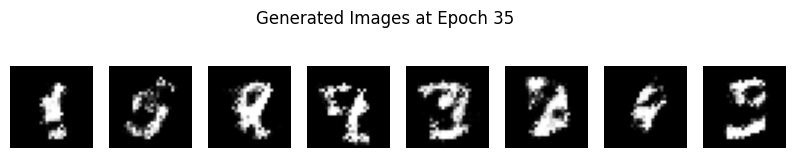

[36] D Loss: 1.2892 | G Loss: 0.8345


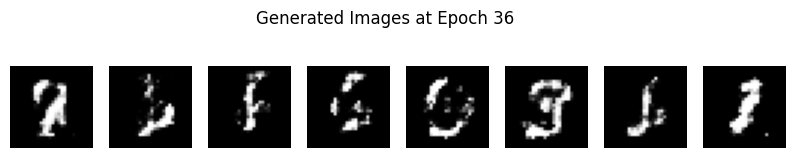

[37] D Loss: 1.3515 | G Loss: 0.8466


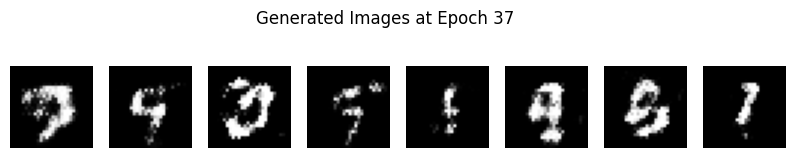

[38] D Loss: 1.2861 | G Loss: 0.8890


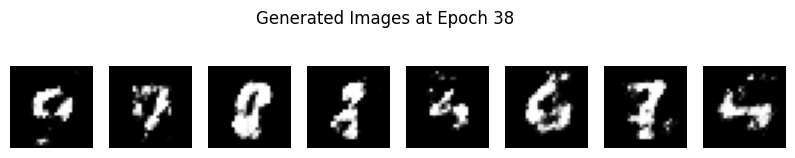

[39] D Loss: 1.2848 | G Loss: 0.9000


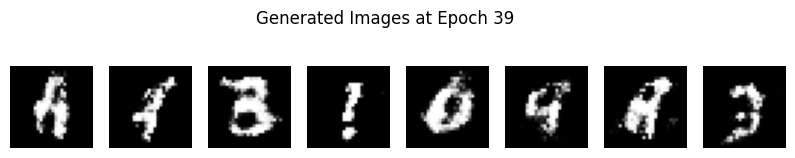

[40] D Loss: 1.3377 | G Loss: 0.8515


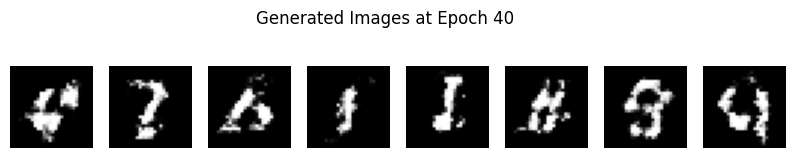

[41] D Loss: 1.3801 | G Loss: 0.8250


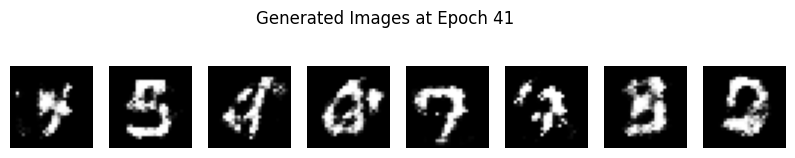

[42] D Loss: 1.2963 | G Loss: 0.9037


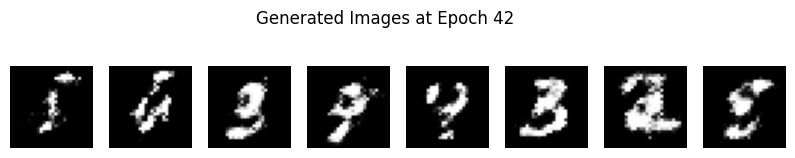

[43] D Loss: 1.2700 | G Loss: 0.8699


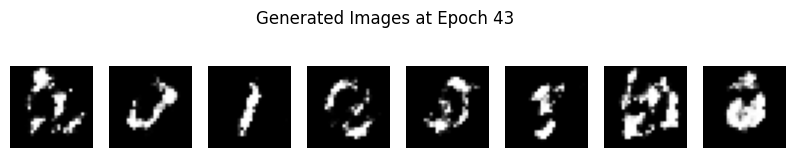

[44] D Loss: 1.2503 | G Loss: 0.8616


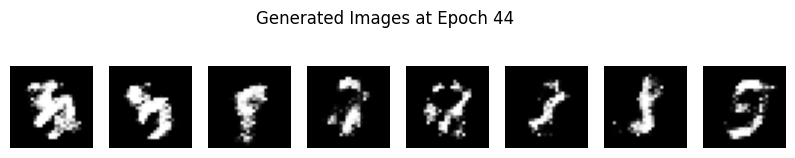

[45] D Loss: 1.3718 | G Loss: 0.8355


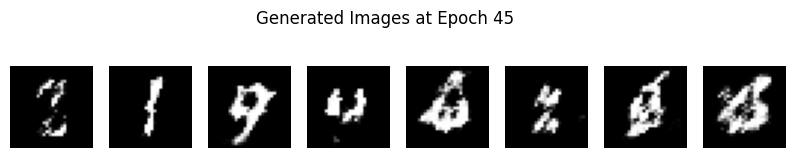

[46] D Loss: 1.2121 | G Loss: 0.9269


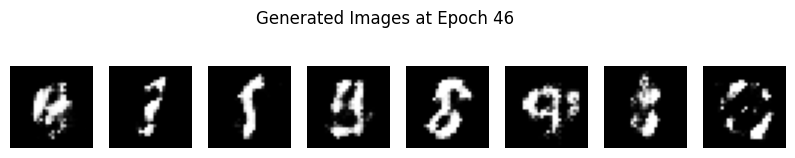

[47] D Loss: 1.3600 | G Loss: 0.8549


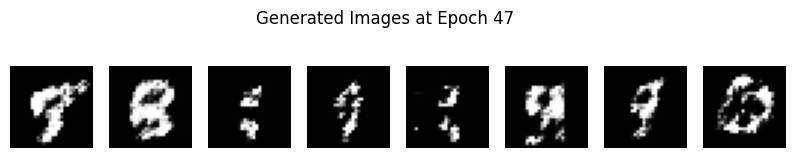

[48] D Loss: 1.3529 | G Loss: 0.8646


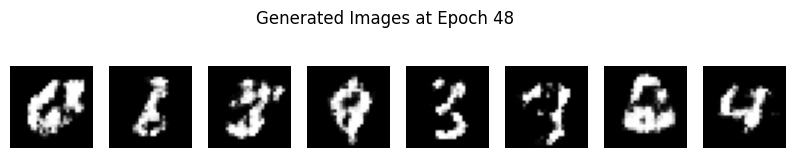

[49] D Loss: 1.3780 | G Loss: 0.8082


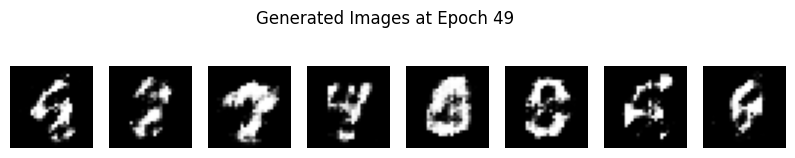

[50] D Loss: 1.2662 | G Loss: 0.9061


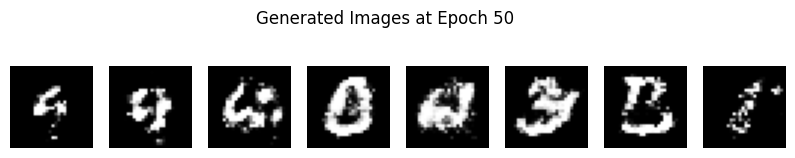

[51] D Loss: 1.3409 | G Loss: 0.8299


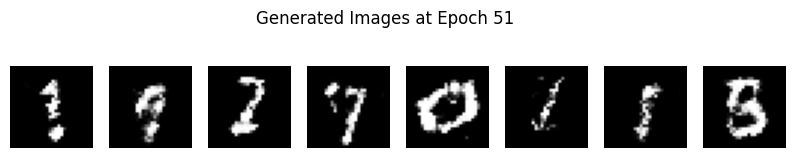

[52] D Loss: 1.3153 | G Loss: 0.8517


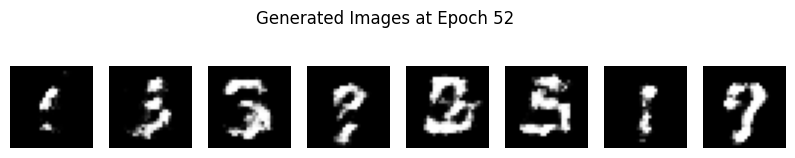

[53] D Loss: 1.2920 | G Loss: 0.8656


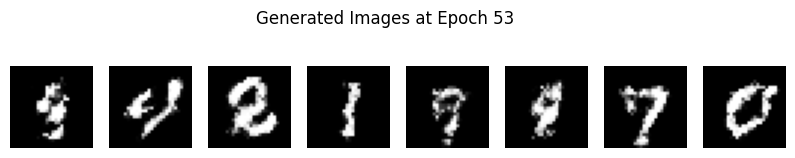

[54] D Loss: 1.2830 | G Loss: 0.8794


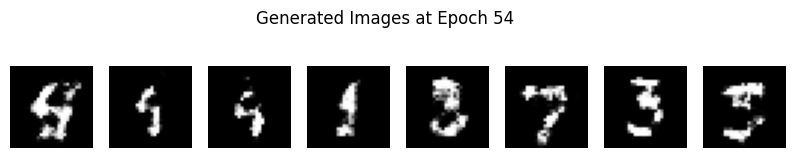

[55] D Loss: 1.2994 | G Loss: 0.8378


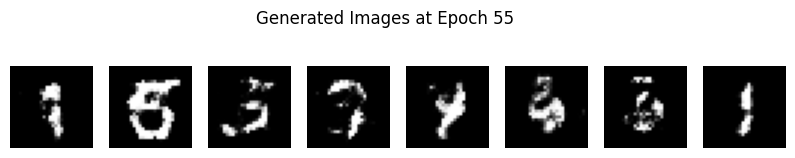

[56] D Loss: 1.3160 | G Loss: 0.8586


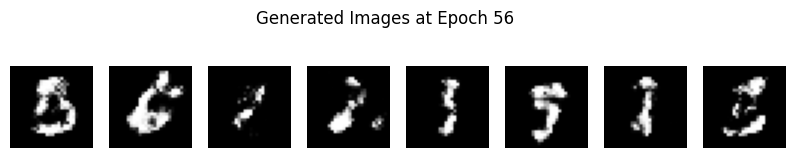

[57] D Loss: 1.3217 | G Loss: 0.8116


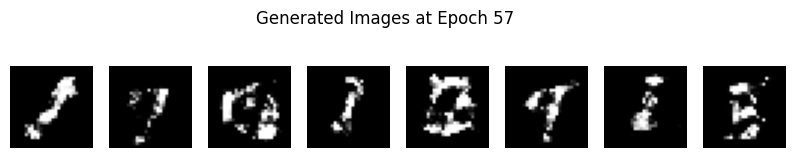

[58] D Loss: 1.3354 | G Loss: 0.8356


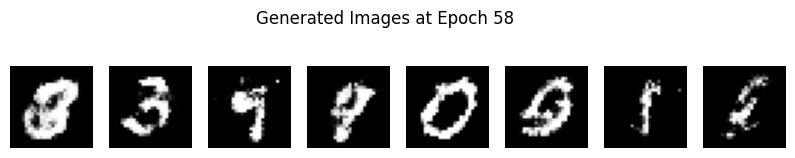

[59] D Loss: 1.2448 | G Loss: 0.8839


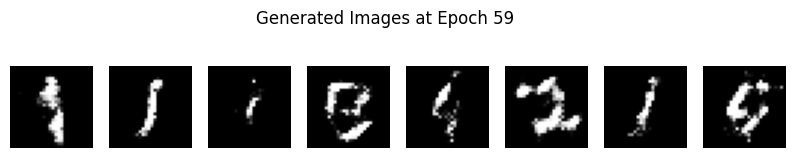

[60] D Loss: 1.2268 | G Loss: 0.9283


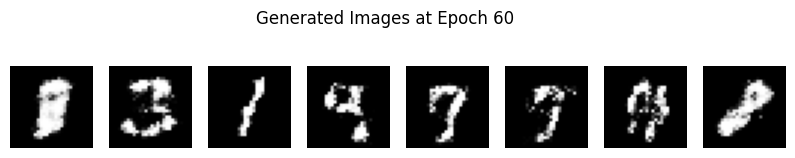

[61] D Loss: 1.2455 | G Loss: 0.9403


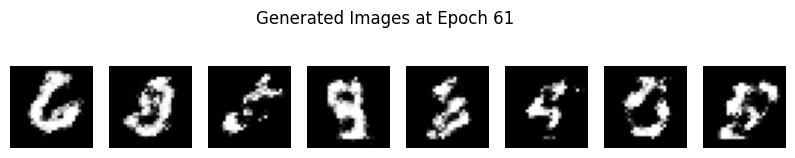

[62] D Loss: 1.3379 | G Loss: 0.8438


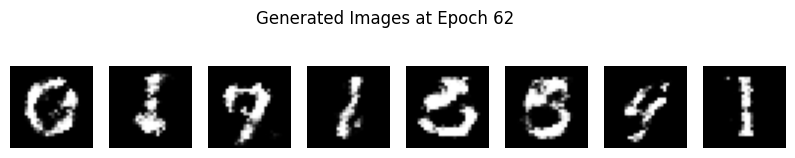

[63] D Loss: 1.3378 | G Loss: 0.8182


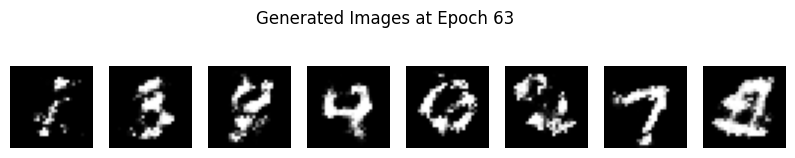

[64] D Loss: 1.3856 | G Loss: 0.8209


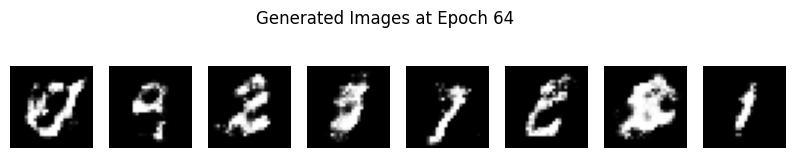

[65] D Loss: 1.3223 | G Loss: 0.8429


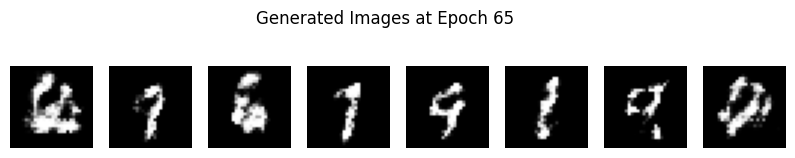

[66] D Loss: 1.3649 | G Loss: 0.7987


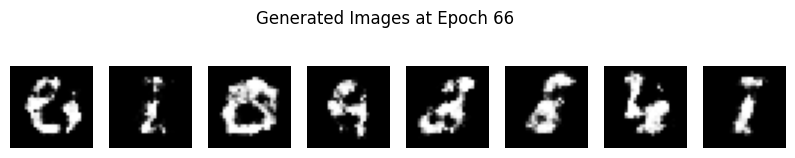

[67] D Loss: 1.2705 | G Loss: 0.8702


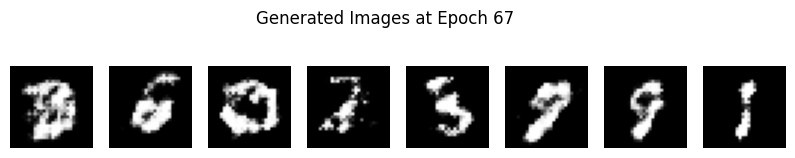

[68] D Loss: 1.3390 | G Loss: 0.8513


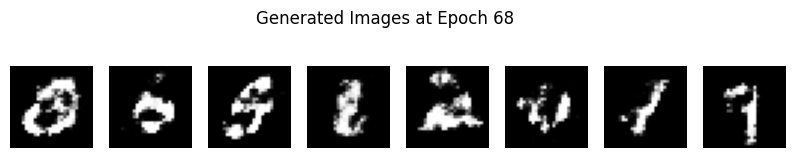

[69] D Loss: 1.2998 | G Loss: 0.8818


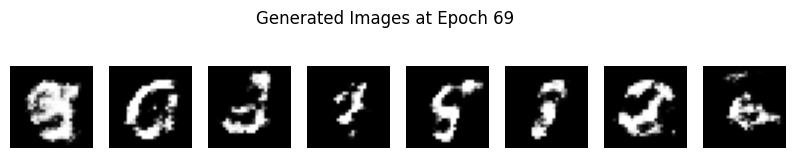

[70] D Loss: 1.2462 | G Loss: 0.9563


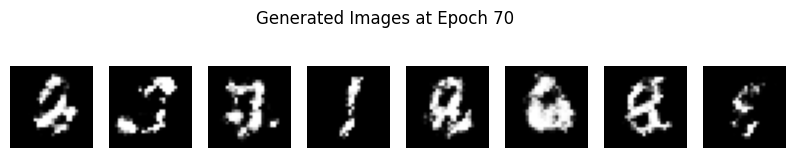

[71] D Loss: 1.3377 | G Loss: 0.8940


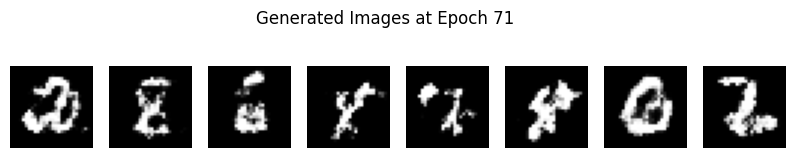

[72] D Loss: 1.2910 | G Loss: 0.8776


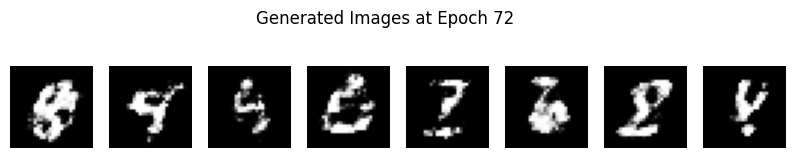

[73] D Loss: 1.3430 | G Loss: 0.8539


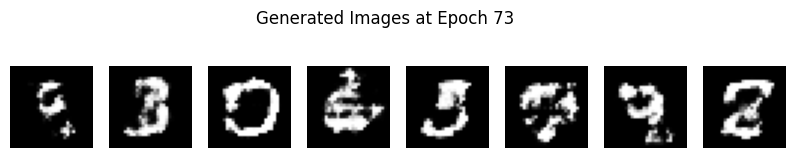

[74] D Loss: 1.3629 | G Loss: 0.8331


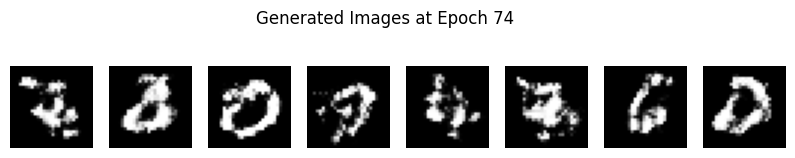

[75] D Loss: 1.2919 | G Loss: 0.8575


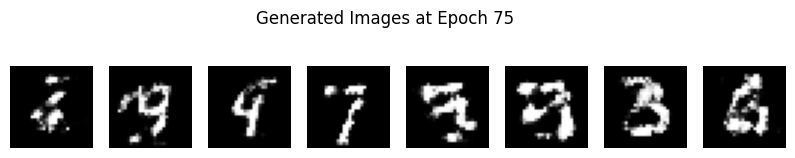

[76] D Loss: 1.3523 | G Loss: 0.8386


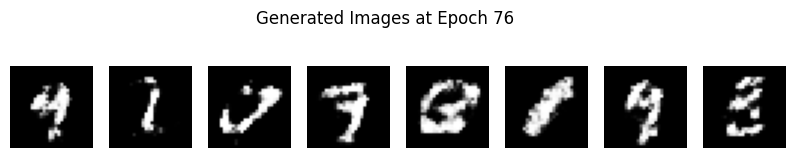

[77] D Loss: 1.3526 | G Loss: 0.8158


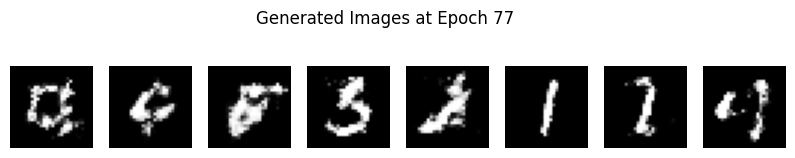

[78] D Loss: 1.3007 | G Loss: 0.8562


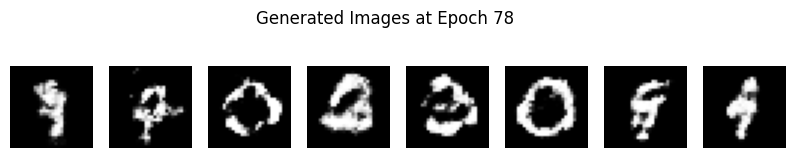

[79] D Loss: 1.3520 | G Loss: 0.8336


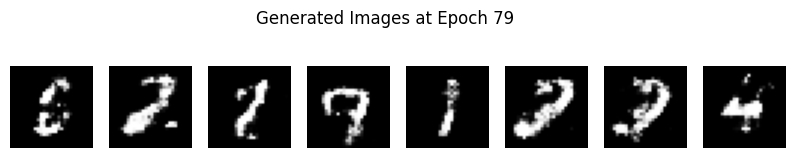

[80] D Loss: 1.2919 | G Loss: 0.8595


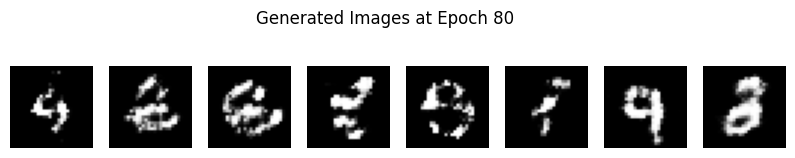

[81] D Loss: 1.3585 | G Loss: 0.8288


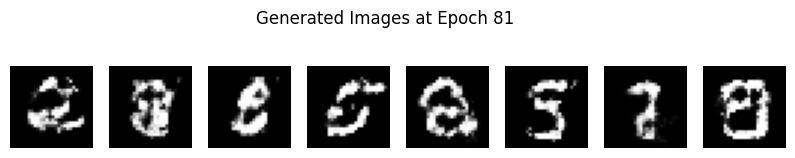

[82] D Loss: 1.3039 | G Loss: 0.8780


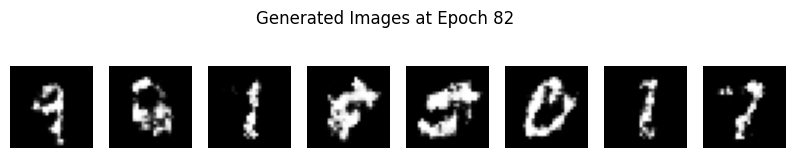

[83] D Loss: 1.3260 | G Loss: 0.8656


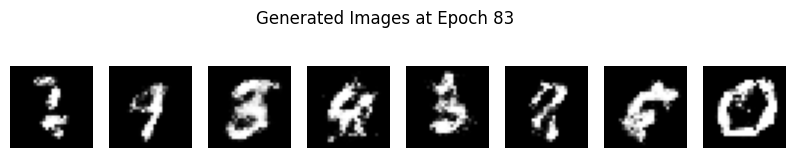

[84] D Loss: 1.3011 | G Loss: 0.8678


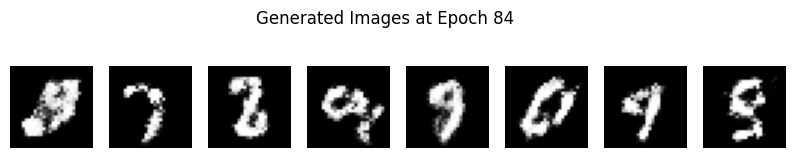

[85] D Loss: 1.2984 | G Loss: 0.9006


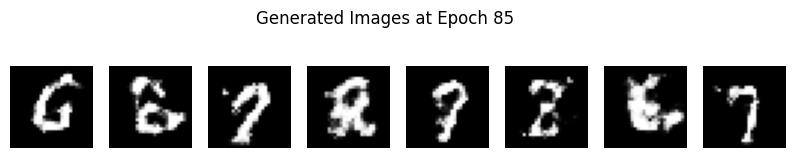

[86] D Loss: 1.3416 | G Loss: 0.8420


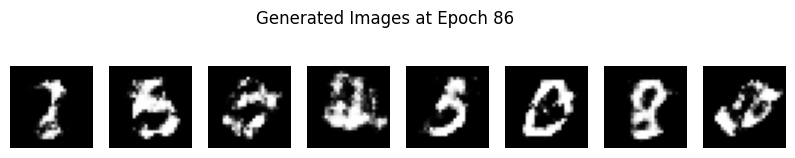

[87] D Loss: 1.3477 | G Loss: 0.8188


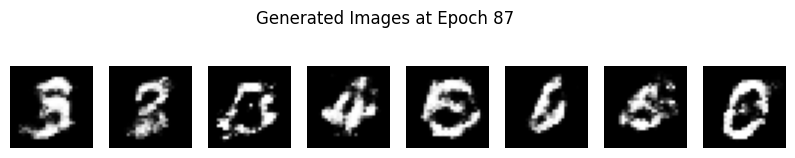

[88] D Loss: 1.3524 | G Loss: 0.8242


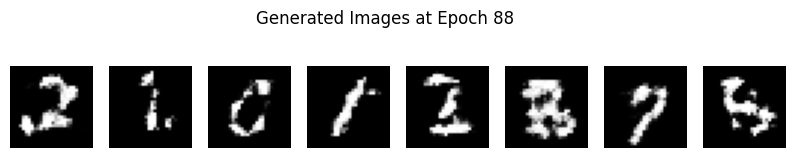

[89] D Loss: 1.3278 | G Loss: 0.8751


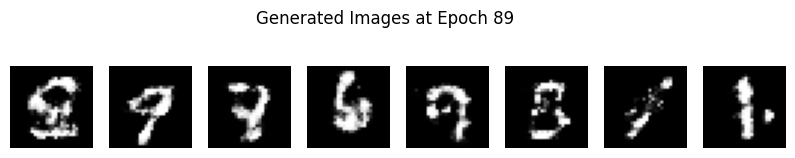

[90] D Loss: 1.3104 | G Loss: 0.8406


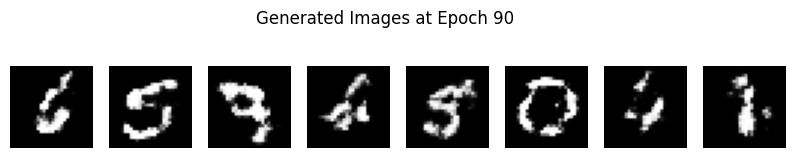

[91] D Loss: 1.3270 | G Loss: 0.8345


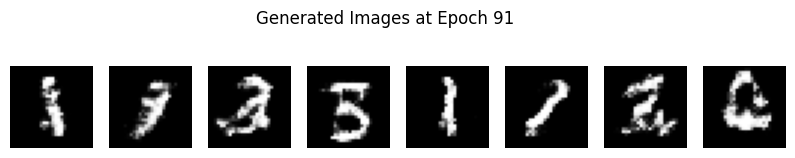

[92] D Loss: 1.3454 | G Loss: 0.8339


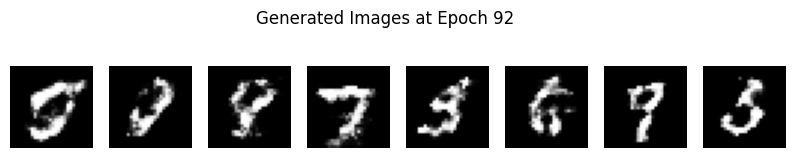

[93] D Loss: 1.3416 | G Loss: 0.8402


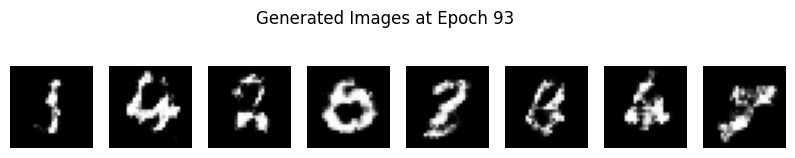

[94] D Loss: 1.3358 | G Loss: 0.8364


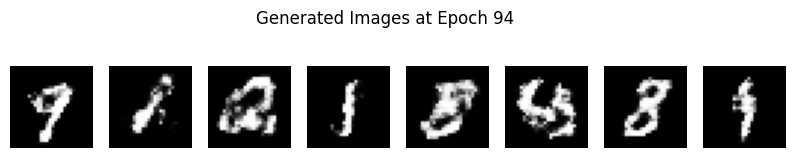

[95] D Loss: 1.3446 | G Loss: 0.8295


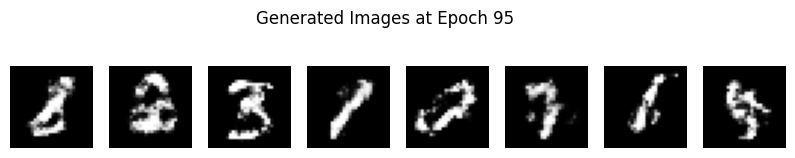

[96] D Loss: 1.3406 | G Loss: 0.8340


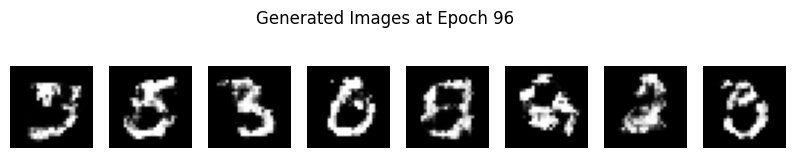

[97] D Loss: 1.3340 | G Loss: 0.8376


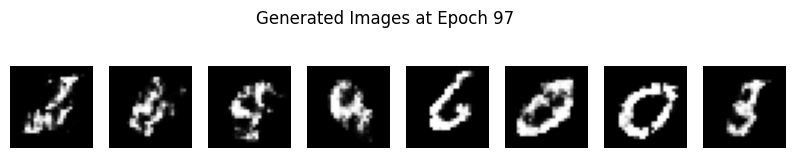

[98] D Loss: 1.3604 | G Loss: 0.8053


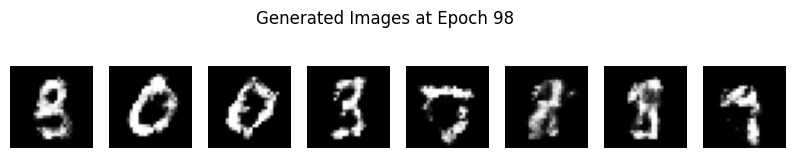

[99] D Loss: 1.3327 | G Loss: 0.8345


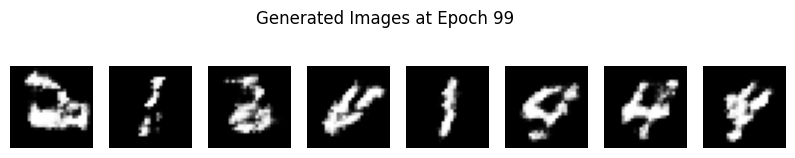

In [3]:
# class discriminator(torch.nn.Module):
#     def __init__(self):
#         super(discriminator, self).__init__()

#         self.enc_conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.enc_conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.enc_dropout1 = nn.Dropout(0.25)
#         self.enc_dropout2 = nn.Dropout(0.5)
#         self.enc_fc1 = nn.Linear(9216, 128)
#         self.enc_fc2 = nn.Linear(128, 1)
    
#     def forward(self,input):
#         x = input.view(-1,1,28,28)
#         # print(x.shape)
#         x = self.enc_conv1(x) # now a (batch_size, 32, 26, 26) sized tensor
#         # print(x.shape)
#         x = F.relu(x)
#         x = self.enc_conv2(x) # now a (batch_size, 64,24,24) sized tensor
#         # print(x.shape)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)# now a (batch_size, 64,12,12) sized tensor
#         # print(x.shape)
#         x = self.enc_dropout1(x)
#         x = torch.flatten(x, 1)# now a 9216
#         # print(x.shape)
#         x = self.enc_fc1(x)
#         x = F.relu(x)
#         x = self.enc_dropout2(x)
#         x = self.enc_fc2(x)
#         # print(x.shape)
#         prediction = F.relu(x)
#         return prediction
        
# class generator(torch.nn.Module):
#     def __init__(self):
#         super(generator, self).__init__()

#         self.dec_fc1 = nn.Linear(10,128)
#         self.dec_fc2 = nn.Linear(128,9216)
#         self.dec_fc3 = nn.Linear(9216,30976)
#         self.dec_deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1)
#         self.dec_deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1)
#         self.dec_deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1)

#     def forward(self, latent):
#         # print("decoder")
#         x = self.dec_fc1(latent)
#         # print(x.shape)
#         x = F.relu(x)
#         x = self.dec_fc2(x)
#         # print(x.shape)
#         x = F.relu(x)
#         x = self.dec_fc3(x)
#         x = F.relu(x)
#         x = x.view(-1,64,22,22)
#         # print(x.shape)
#         x = self.dec_deconv1(x)
#         x = F.relu(x)
#         x = self.dec_deconv2(x)
#         x = F.relu(x)
#         x = self.dec_deconv3(x)
#         x = F.tanh(x)
#         x = (x+1)/2
#         x = torch.flatten(x,1)
#         return x

# class ScaleFromTanh(nn.Module):
#     def __init__(self, min_val=0.0, max_val=16.0):
#         super().__init__()
#         self.min = min_val
#         self.max = max_val

#     def forward(self, x):
#         # Convert [-1, 1] to [0, 1] first, then scale to [min, max]
#         x = (x + 1) / 2  # now in [0, 1]
#         return x * (self.max - self.min) + self.min

class generator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU(True),
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 14x14
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1),    # 28x28
            nn.Tanh(),
            nn.Flatten()
        )

    def forward(self, z):
        return (self.net(z)+1)/2

class discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

def visualise_prediction(generator, epoch=None, n=8):
    generator.eval()
    z = torch.randn(n, 10).to(device)
    with torch.no_grad():
        samples = generator(z).view(-1, 28, 28).cpu()

    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for img, ax in zip(samples, axes):
        ax.imshow(img, cmap="gray", vmin=0, vmax=1)
        ax.axis('off')
    plt.suptitle(f"Generated Images {f'at Epoch {epoch}' if epoch else ''}")
    plt.show()

 

gen = generator().to(device)
dis = discriminator().to(device)
gen.apply(weights_init)
dis.apply(weights_init)
visualise_prediction(gen)


opt_G = torch.optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(dis.parameters(), lr=0.0002, betas=(0.5, 0.999))
loss_fn = nn.BCEWithLogitsLoss()
epochs = 100

for epoch in range(epochs):
    for real_image in train_loader:
        real_image = real_image.to(device)
        batch_size = real_image.size(0)

        real_labels = torch.full((batch_size, 1), 0.9, device=device)
        fake_labels = torch.zeros((batch_size, 1), device=device)

        # Train Discriminator
        z = torch.randn(batch_size, 10).to(device)
        fake_images = gen(z).detach()
        d_loss_real = loss_fn(dis(real_image), real_labels)
        d_loss_fake = loss_fn(dis(fake_images), fake_labels)
        d_loss = d_loss_real + d_loss_fake

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch_size, 10).to(device)
        g_images = gen(z)
        g_loss = loss_fn(dis(g_images), real_labels)

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"[{epoch}] D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    # if epoch % 10 == 0:
    visualise_prediction(gen, epoch)


Epoch 1/100 | D Loss: 1.3892 | G Loss: 0.5626


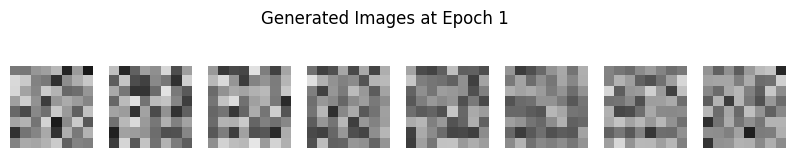

Epoch 2/100 | D Loss: 1.2272 | G Loss: 0.6016
Epoch 3/100 | D Loss: 1.1635 | G Loss: 0.6360
Epoch 4/100 | D Loss: 1.1038 | G Loss: 0.6469
Epoch 5/100 | D Loss: 1.0689 | G Loss: 0.6335
Epoch 6/100 | D Loss: 1.2560 | G Loss: 0.5950
Epoch 7/100 | D Loss: 1.2616 | G Loss: 0.6785
Epoch 8/100 | D Loss: 1.3107 | G Loss: 0.6084
Epoch 9/100 | D Loss: 1.3084 | G Loss: 0.5848
Epoch 10/100 | D Loss: 1.3005 | G Loss: 0.6557


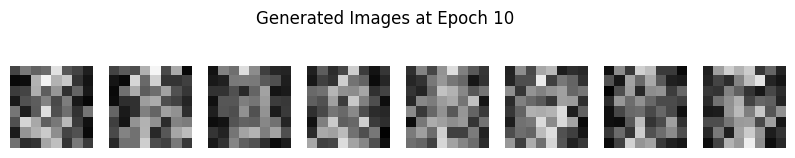

Epoch 11/100 | D Loss: 1.2051 | G Loss: 0.6715
Epoch 12/100 | D Loss: 1.3398 | G Loss: 0.6818
Epoch 13/100 | D Loss: 1.3383 | G Loss: 0.7371
Epoch 14/100 | D Loss: 1.3136 | G Loss: 0.7128
Epoch 15/100 | D Loss: 1.3026 | G Loss: 0.7385
Epoch 16/100 | D Loss: 1.2402 | G Loss: 0.7163
Epoch 17/100 | D Loss: 1.2622 | G Loss: 0.7752
Epoch 18/100 | D Loss: 1.1403 | G Loss: 0.7651
Epoch 19/100 | D Loss: 1.2197 | G Loss: 0.8319
Epoch 20/100 | D Loss: 1.3205 | G Loss: 0.8164


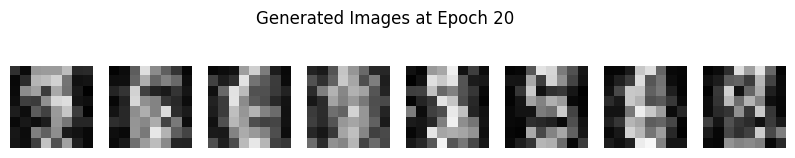

Epoch 21/100 | D Loss: 1.1703 | G Loss: 0.7850
Epoch 22/100 | D Loss: 1.1984 | G Loss: 0.8029
Epoch 23/100 | D Loss: 1.1992 | G Loss: 0.8047
Epoch 24/100 | D Loss: 1.1935 | G Loss: 0.7915
Epoch 25/100 | D Loss: 1.2261 | G Loss: 0.8311
Epoch 26/100 | D Loss: 1.2640 | G Loss: 0.7105
Epoch 27/100 | D Loss: 1.2814 | G Loss: 0.7852
Epoch 28/100 | D Loss: 1.2344 | G Loss: 0.7567
Epoch 29/100 | D Loss: 1.2624 | G Loss: 0.7976
Epoch 30/100 | D Loss: 1.2852 | G Loss: 0.9018


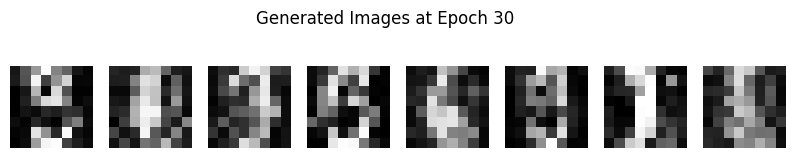

Epoch 31/100 | D Loss: 1.2969 | G Loss: 0.8566
Epoch 32/100 | D Loss: 1.2453 | G Loss: 0.8028
Epoch 33/100 | D Loss: 1.2945 | G Loss: 0.8287
Epoch 34/100 | D Loss: 1.2106 | G Loss: 0.8304
Epoch 35/100 | D Loss: 1.1909 | G Loss: 0.7977
Epoch 36/100 | D Loss: 1.2651 | G Loss: 0.8025
Epoch 37/100 | D Loss: 1.2793 | G Loss: 0.8325
Epoch 38/100 | D Loss: 1.2504 | G Loss: 0.7953
Epoch 39/100 | D Loss: 1.3056 | G Loss: 0.8040
Epoch 40/100 | D Loss: 1.2306 | G Loss: 0.8622


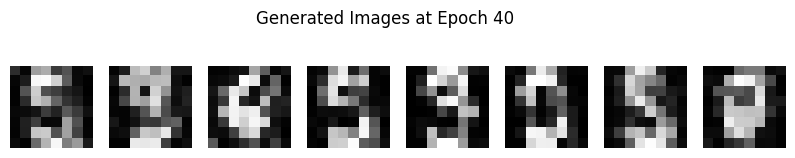

Epoch 41/100 | D Loss: 1.2375 | G Loss: 0.8153
Epoch 42/100 | D Loss: 1.2977 | G Loss: 0.7909
Epoch 43/100 | D Loss: 1.2552 | G Loss: 0.7817
Epoch 44/100 | D Loss: 1.2262 | G Loss: 0.7959
Epoch 45/100 | D Loss: 1.2256 | G Loss: 0.8793
Epoch 46/100 | D Loss: 1.3286 | G Loss: 0.8417
Epoch 47/100 | D Loss: 1.2669 | G Loss: 0.8853
Epoch 48/100 | D Loss: 1.3252 | G Loss: 0.8144
Epoch 49/100 | D Loss: 1.1421 | G Loss: 0.8094
Epoch 50/100 | D Loss: 1.2631 | G Loss: 0.8108


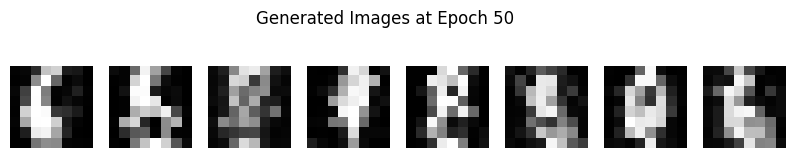

Epoch 51/100 | D Loss: 1.2635 | G Loss: 0.8389
Epoch 52/100 | D Loss: 1.4048 | G Loss: 0.8394
Epoch 53/100 | D Loss: 1.3156 | G Loss: 0.8519
Epoch 54/100 | D Loss: 1.3624 | G Loss: 0.7978
Epoch 55/100 | D Loss: 1.2142 | G Loss: 0.7981
Epoch 56/100 | D Loss: 1.2893 | G Loss: 0.8033
Epoch 57/100 | D Loss: 1.3514 | G Loss: 0.8282
Epoch 58/100 | D Loss: 1.3474 | G Loss: 0.8232
Epoch 59/100 | D Loss: 1.3358 | G Loss: 0.7447
Epoch 60/100 | D Loss: 1.3109 | G Loss: 0.8133


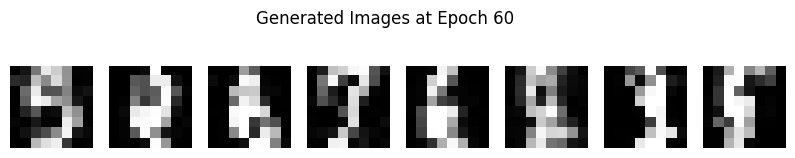

Epoch 61/100 | D Loss: 1.3309 | G Loss: 0.7701
Epoch 62/100 | D Loss: 1.2392 | G Loss: 0.8211
Epoch 63/100 | D Loss: 1.3862 | G Loss: 0.8472
Epoch 64/100 | D Loss: 1.2864 | G Loss: 0.7348
Epoch 65/100 | D Loss: 1.2673 | G Loss: 0.8917
Epoch 66/100 | D Loss: 1.2292 | G Loss: 0.7960
Epoch 67/100 | D Loss: 1.3149 | G Loss: 0.8224
Epoch 68/100 | D Loss: 1.3291 | G Loss: 0.8302
Epoch 69/100 | D Loss: 1.2828 | G Loss: 0.8602
Epoch 70/100 | D Loss: 1.2208 | G Loss: 0.8328


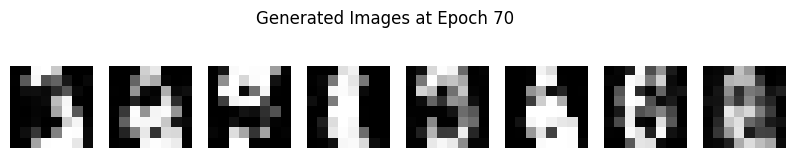

Epoch 71/100 | D Loss: 1.3189 | G Loss: 0.7914
Epoch 72/100 | D Loss: 1.2886 | G Loss: 0.7914
Epoch 73/100 | D Loss: 1.1802 | G Loss: 0.8259
Epoch 74/100 | D Loss: 1.3928 | G Loss: 0.8400
Epoch 75/100 | D Loss: 1.2718 | G Loss: 0.8363
Epoch 76/100 | D Loss: 1.2684 | G Loss: 0.8128
Epoch 77/100 | D Loss: 1.4207 | G Loss: 0.7864
Epoch 78/100 | D Loss: 1.3322 | G Loss: 0.7956
Epoch 79/100 | D Loss: 1.3306 | G Loss: 0.9044
Epoch 80/100 | D Loss: 1.2689 | G Loss: 0.8178


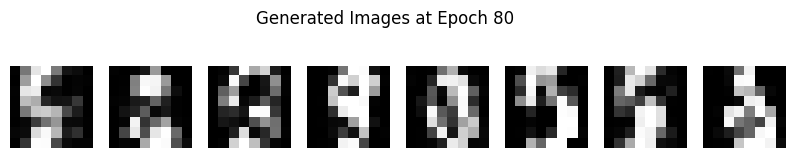

Epoch 81/100 | D Loss: 1.2783 | G Loss: 0.7995
Epoch 82/100 | D Loss: 1.3287 | G Loss: 0.7504
Epoch 83/100 | D Loss: 1.4127 | G Loss: 0.7995
Epoch 84/100 | D Loss: 1.4451 | G Loss: 0.8321
Epoch 85/100 | D Loss: 1.2258 | G Loss: 0.8125
Epoch 86/100 | D Loss: 1.3787 | G Loss: 0.7765
Epoch 87/100 | D Loss: 1.3354 | G Loss: 0.8161
Epoch 88/100 | D Loss: 1.4275 | G Loss: 0.7622
Epoch 89/100 | D Loss: 1.3735 | G Loss: 0.8238
Epoch 90/100 | D Loss: 1.3415 | G Loss: 0.8141


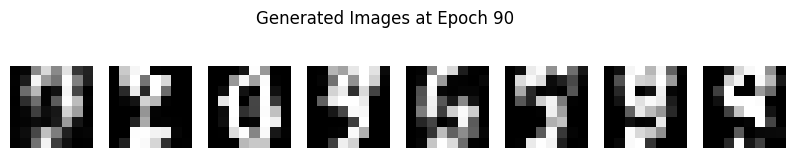

Epoch 91/100 | D Loss: 1.3508 | G Loss: 0.7838
Epoch 92/100 | D Loss: 1.2079 | G Loss: 0.9093
Epoch 93/100 | D Loss: 1.3053 | G Loss: 0.8655
Epoch 94/100 | D Loss: 1.3765 | G Loss: 0.8511
Epoch 95/100 | D Loss: 1.2417 | G Loss: 0.8318
Epoch 96/100 | D Loss: 1.3052 | G Loss: 0.8547
Epoch 97/100 | D Loss: 1.2151 | G Loss: 0.8483
Epoch 98/100 | D Loss: 1.3132 | G Loss: 0.7532
Epoch 99/100 | D Loss: 1.2962 | G Loss: 0.9457
Epoch 100/100 | D Loss: 1.2678 | G Loss: 0.9201


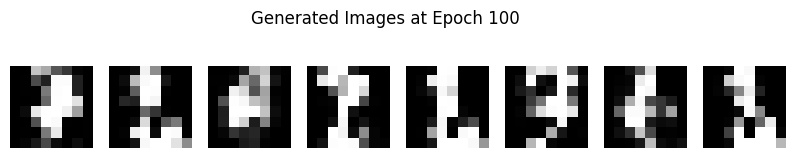

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# --- DATA ---
digits = load_digits()
X = MinMaxScaler((-1, 1)).fit_transform(digits.data)
X = torch.tensor(X, dtype=torch.float32)
dataloader = DataLoader(TensorDataset(X), batch_size=64, shuffle=True)

# --- DEVICE ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- HYPERPARAMETERS ---
z_dim = 20
lr = 0.0002
epochs = 100
label_smoothing = 0.9  # instead of 1.0
noise_std = 0.1

# --- MODELS ---
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

# --- WEIGHT INIT ---
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

G = Generator().to(device)
D = Discriminator().to(device)
G.apply(weights_init)
D.apply(weights_init)

# --- OPTIMIZERS AND LOSS ---
opt_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCEWithLogitsLoss()

# --- VISUALIZATION FUNCTION ---
def show_generated_images(generator, epoch, n=8):
    generator.eval()
    z = torch.randn(n, z_dim).to(device)
    with torch.no_grad():
        samples = generator(z).cpu().view(-1, 8, 8)
    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for img, ax in zip(samples, axes):
        ax.imshow(img, cmap="gray", vmin=-1, vmax=1)
        ax.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()
    generator.train()

# --- TRAINING LOOP ---
for epoch in range(1, epochs + 1):
    for real_batch, in dataloader:
        real_batch = real_batch.to(device)
        batch_size = real_batch.size(0)

        # Add instance noise to real images
        real_batch += noise_std * torch.randn_like(real_batch)

        # Create labels
        real_labels = torch.full((batch_size, 1), label_smoothing, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        z = torch.randn(batch_size, z_dim, device=device)
        fake_data = G(z).detach()
        d_real = D(real_batch)
        d_fake = D(fake_data)
        loss_D_real = criterion(d_real, real_labels)
        loss_D_fake = criterion(d_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch_size, z_dim, device=device)
        fake_data = G(z)
        fake_preds = D(fake_data)
        loss_G = criterion(fake_preds, real_labels)

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch}/{epochs} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")
    if epoch % 10 == 0 or epoch == 1:
        show_generated_images(G, epoch)
